# **Colab Environment Setup**

In [1]:
# Clone Lab 2's github repository to get all of our material first

!git clone https://github.com/difersalest/DM2025-Lab2-Exercise.git

fatal: destination path 'DM2025-Lab2-Exercise' already exists and is not an empty directory.


In [2]:
# Installing all of our dependencies
# The lab in colab was tested with this, and everything should work as intended
# If in your case something is not working please notify the TAs
!pip3 install python-dotenv==1.1.1 google-genai==1.33.0 langextract==1.0.9 langchain==0.3.27 langchain_community==0.3.29 langchain_core==0.3.75 langchain-google-genai==2.1.10 beautifulsoup4==4.13.5 chromadb==1.0.20 gradio==5.44.1 jupyter==1.1.1 scikit-learn==1.7.1 pandas==2.3.2 numpy==1.26.4 matplotlib==3.10.6 plotly==6.3.0 seaborn==0.13.2 nltk==3.9.1 umap-learn==0.5.9.post2 pymupdf==1.26.4

In [3]:
# test code for environment setup
# import library
import dotenv
from google import genai
import langextract
import langchain
from langchain_community import utils
from langchain_core import prompts
from langchain_google_genai import chat_models
from bs4 import BeautifulSoup
import chromadb
import gradio
import jupyter
import sklearn
import pandas
import numpy
import matplotlib
import plotly
import seaborn
import nltk
import umap
import pymupdf

%matplotlib inline

##### **OPTIONAL: If you want to save your outputs you can send them to your own drive by mounting the drive in the following way (uncomment the lines):**

In [4]:

# Remember to change the directory of your outputs to your folder in the new mounted google drive inside colab
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Data Mining Lab 2 - Phase 2
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## Before Starting

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://drive.google.com/uc?export=view&id=1qurztXdx30Wl2vkCZg7KXXJYJXcE6YR_)

---
## **1. Data Preparation**

---
## **1.1 Load data**

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [5]:
import pandas as pd

### training data
anger_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [6]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [7]:
### testing data
anger_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [8]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [9]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### **1.2 Save data**

In [10]:
# save to pickle file
train_df.to_pickle("./DM2025-Lab2-Exercise/data/train_df.pkl")
test_df.to_pickle("./DM2025-Lab2-Exercise/data/test_df.pkl")

In [11]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./DM2025-Lab2-Exercise/data/train_df.pkl")
test_df = pd.read_pickle("./DM2025-Lab2-Exercise/data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## **2. Large Language Models (LLMs)**

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs:

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### Open-Source vs. Proprietary LLMs
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](https://drive.google.com/uc?export=view&id=1ZvD7_yeSCETl98vXI5zo_TikF6Wpu0-r)

### Why Use Code (API) for Data Mining?

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](https://drive.google.com/uc?export=view&id=1UGHgSyH2-m2ZdjJXJ39_8RCgZov2z94d)

![pic14.png](https://drive.google.com/uc?export=view&id=1D0Q5KpS5bNIH8er0kb8SWt1nZJhfufWa)

### The Gemini API

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### Interacting with the Gemini API

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [12]:
import os
from google.colab import userdata
from google import genai
from google.genai import types


# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite"

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

# We input the API Key to be able to use the Gemini models
api_key = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )

            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config

            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### **2.1 Text Prompting**

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [13]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [14]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [15]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### **>>> Exercise 1 (Take home):**

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite).
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [20]:
# Answer here
#1.
input_prompt = ["What are the common method of Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
display(Markdown(text_response))
print("======================================================================")
#2.
text_response, logs = prompt_gemini(input_prompt = input_prompt, model_name = "gemini-2.0-flash", with_tokens_info = True)
display(Markdown(text_response))
print("======================================================================")
#3.gemini-2.0-flash compare to gemini-2.5-flash-lite, although there basic structures and answer's backbone are basically the same.
#like gemini-2.5-flash-lite mention  "Time Series Analysis" and gemini-2.0-flash also mention it, but the difference is gemini-2.0-flash
#provide purpose and example which let us have a better understanding on what "Time Series Analysis" is actually about.
print("======================================================================")
#4.
SYSTEM_INSTRUCTION = (
        "You are a data mining master"
    )
text_response, logs = prompt_gemini(input_prompt = input_prompt, system_instruction = SYSTEM_INSTRUCTION, with_tokens_info = True)
display(Markdown(text_response))
#it perform slightly better than 1. did, like it finally mention RNN in "Time Series Analysis" but still come with no example
#and purpose, overall I think that the right system instruction will make the model to perform slightly better maybe with a
#a better system instruction it could even surpass more advance model with no system instruction.

Data mining is a broad field, and the methods used can be categorized in several ways. However, here are some of the most common and widely recognized methods of data mining, often grouped by the type of task they perform:

**1. Classification:**

This method aims to assign items to predefined categories or classes. It's about predicting a categorical label.

*   **Decision Trees:** Tree-like structures where internal nodes represent tests on attributes, branches represent outcomes of the tests, and leaf nodes represent class labels.
    *   *Algorithms:* ID3, C4.5, CART (Classification and Regression Trees)
*   **Support Vector Machines (SVMs):** A powerful algorithm that finds an optimal hyperplane to separate data points into different classes.
*   **Naive Bayes:** A probabilistic classifier based on Bayes' theorem with the "naive" assumption of independence between features.
*   **K-Nearest Neighbors (KNN):** Classifies a data point based on the majority class of its 'k' nearest neighbors in the feature space.
*   **Logistic Regression:** A statistical model used for binary classification problems, predicting the probability of an instance belonging to a particular class.
*   **Neural Networks (specifically for classification):** Multi-layered networks of interconnected nodes that learn complex patterns.

**2. Regression:**

This method aims to predict a continuous numerical value. It's about forecasting a quantity.

*   **Linear Regression:** Models the relationship between a dependent variable and one or more independent variables by fitting a linear equation.
*   **Polynomial Regression:** Extends linear regression by allowing for polynomial relationships between variables.
*   **Decision Trees (for regression):** Similar to classification trees, but leaf nodes predict a continuous value.
*   **Support Vector Regression (SVR):** An adaptation of SVMs for regression tasks.
*   **Neural Networks (specifically for regression):** Can be used to predict continuous values.

**3. Clustering:**

This method aims to group similar data points together into clusters without prior knowledge of the groups. It's about discovering inherent groupings.

*   **K-Means Clustering:** An iterative algorithm that partitions data into 'k' clusters, where each data point belongs to the cluster with the nearest mean.
*   **Hierarchical Clustering:** Builds a hierarchy of clusters, either by starting with individual data points and merging them (agglomerative) or by starting with one large cluster and splitting it (divisive).
*   **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** Groups together points that are closely packed together, marking points in low-density regions as outliers.
*   **Mean-Shift Clustering:** A non-parametric clustering algorithm that finds modes (peaks) in the data distribution.

**4. Association Rule Mining:**

This method aims to discover interesting relationships or associations between items in a dataset, often expressed as "if-then" rules.

*   **Apriori Algorithm:** A classic algorithm for mining frequent itemsets and generating association rules. It uses a breadth-first search approach.
*   **FP-Growth (Frequent Pattern Growth):** An efficient algorithm for mining frequent itemsets that avoids the costly candidate generation step of Apriori.

**5. Anomaly Detection (Outlier Detection):**

This method aims to identify data points that deviate significantly from the norm or expected behavior.

*   **Statistical Methods:** Using statistical measures like z-scores or standard deviations to identify outliers.
*   **Distance-Based Methods:** Identifying points that are far from their neighbors.
*   **Density-Based Methods:** Identifying points in low-density regions (similar to DBSCAN).
*   **Machine Learning Models:** Using classification or clustering models to identify anomalies.

**6. Sequential Pattern Mining:**

This method aims to discover frequently occurring ordered sequences of events in a dataset.

*   **GSP (Generalized Sequential Patterns):** An algorithm for mining sequential patterns.
*   **PrefixSpan (Prefix-Projected Sequential Pattern Mining):** An efficient algorithm that avoids candidate generation.

**7. Text Mining:**

This method applies data mining techniques to unstructured text data to extract meaningful information.

*   **Tokenization:** Breaking text into individual words or phrases.
*   **Stemming and Lemmatization:** Reducing words to their root form.
*   **Stop Word Removal:** Eliminating common words that don't carry much meaning.
*   **Term Frequency-Inverse Document Frequency (TF-IDF):** A statistical measure used to evaluate the importance of a word in a document relative to a collection of documents.
*   **Topic Modeling (e.g., Latent Dirichlet Allocation - LDA):** Discovering abstract "topics" that occur in a collection of documents.

**8. Time Series Analysis:**

This method focuses on analyzing data points collected over time to identify trends, seasonality, and make forecasts.

*   **ARIMA (AutoRegressive Integrated Moving Average):** A statistical model for analyzing and forecasting time series data.
*   **Exponential Smoothing:** A forecasting technique that assigns exponentially decreasing weights to past observations.

**Key Considerations When Choosing a Method:**

*   **The Goal of the Analysis:** What do you want to achieve? Prediction, grouping, finding relationships, etc.?
*   **Type of Data:** Is it numerical, categorical, text, time-series?
*   **Size of the Dataset:** Some algorithms are more scalable than others.
*   **Interpretability:** How important is it to understand *why* a model makes a certain prediction?
*   **Computational Resources:** Some methods are more computationally intensive.

This list covers the most common methods. The field of data mining is constantly evolving, with new algorithms and variations emerging regularly.

Data mining encompasses a variety of methods and techniques used to extract valuable insights and patterns from large datasets. Here's a breakdown of some of the most common methods:

**1. Classification:**

*   **Purpose:**  Predicting the category or class a data point belongs to.  It's about assigning labels.
*   **Examples:**
    *   Spam detection (spam/not spam)
    *   Customer churn prediction (churn/not churn)
    *   Medical diagnosis (disease present/disease absent)
*   **Algorithms:**
    *   **Decision Trees:**  Easy to understand and visualize, creating a tree-like structure of decisions. (e.g., CART, C4.5, ID3)
    *   **Support Vector Machines (SVM):**  Effective in high-dimensional spaces, finding the optimal hyperplane to separate classes.
    *   **Naive Bayes:**  Simple and fast, based on Bayes' theorem with strong (naive) independence assumptions.
    *   **K-Nearest Neighbors (KNN):**  Classifies based on the majority class among its k nearest neighbors.
    *   **Logistic Regression:**  Predicts the probability of a data point belonging to a certain class.
    *   **Neural Networks (including Deep Learning):**  Complex models capable of learning intricate patterns, often used for image and text classification.

**2. Regression:**

*   **Purpose:**  Predicting a continuous numerical value.
*   **Examples:**
    *   Predicting house prices
    *   Forecasting sales revenue
    *   Estimating stock prices
*   **Algorithms:**
    *   **Linear Regression:**  Models the relationship between variables with a linear equation.
    *   **Polynomial Regression:**  Models the relationship with a polynomial equation.
    *   **Support Vector Regression (SVR):**  Similar to SVM but for regression tasks.
    *   **Decision Tree Regression:**  Uses decision trees to predict continuous values.
    *   **Random Forest Regression:**  An ensemble of decision trees for improved accuracy.
    *   **Neural Networks:** Can be used for complex non-linear regression problems.

**3. Clustering:**

*   **Purpose:**  Grouping similar data points together into clusters, without prior knowledge of the groups.  It's about discovering natural groupings in the data.
*   **Examples:**
    *   Customer segmentation
    *   Document clustering
    *   Anomaly detection
*   **Algorithms:**
    *   **K-Means:**  Partitions data into k clusters, where each data point belongs to the cluster with the nearest mean (centroid).
    *   **Hierarchical Clustering:**  Creates a hierarchy of clusters, either by starting with each data point as its own cluster and merging them (agglomerative) or by starting with one big cluster and dividing it (divisive).
    *   **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**  Groups together data points that are closely packed together, marking as outliers points that lie alone in low-density regions.
    *   **Gaussian Mixture Models (GMM):**  Assumes that data points are generated from a mixture of Gaussian distributions.

**4. Association Rule Mining:**

*   **Purpose:**  Discovering relationships or associations between items in a dataset.  Often used for market basket analysis.
*   **Examples:**
    *   "Customers who buy X also tend to buy Y."
    *   Website navigation patterns
*   **Algorithms:**
    *   **Apriori:**  Finds frequent itemsets and then generates association rules.
    *   **Eclat (Equivalence Class Clustering and bottom-up Lattice Traversal):**  Uses a depth-first search approach to find frequent itemsets.
    *   **FP-Growth (Frequent Pattern Growth):**  Builds a frequent pattern tree to efficiently find frequent itemsets.

**5. Anomaly Detection (Outlier Detection):**

*   **Purpose:**  Identifying data points that deviate significantly from the norm.
*   **Examples:**
    *   Fraud detection
    *   Network intrusion detection
    *   Equipment failure prediction
*   **Algorithms:**
    *   **Statistical Methods:**  Using statistical distributions to identify outliers (e.g., Z-score, Grubbs' test).
    *   **Clustering-Based Methods:**  Identifying data points that do not belong to any cluster or belong to very small clusters.
    *   **Distance-Based Methods:**  Identifying data points that are far away from their neighbors.
    *   **One-Class SVM:**  Learns a boundary around the normal data and identifies data points outside this boundary as anomalies.
    *   **Isolation Forest:**  Isolates anomalies by randomly partitioning the data. Anomalies require fewer partitions to be isolated.

**6. Time Series Analysis:**

*   **Purpose:**  Analyzing data points collected over time to identify trends, patterns, and seasonality.
*   **Examples:**
    *   Stock market forecasting
    *   Weather prediction
    *   Demand forecasting
*   **Algorithms:**
    *   **ARIMA (Autoregressive Integrated Moving Average):**  A statistical model that uses past values to predict future values.
    *   **Exponential Smoothing:**  Assigns exponentially decreasing weights to past observations.
    *   **Recurrent Neural Networks (RNNs), especially LSTMs (Long Short-Term Memory):**  Well-suited for capturing long-term dependencies in time series data.

**7. Text Mining (Natural Language Processing - NLP):**

*   **Purpose:**  Extracting meaningful information from text data.
*   **Examples:**
    *   Sentiment analysis
    *   Topic modeling
    *   Text classification
*   **Techniques:**
    *   **Tokenization:** Breaking text into individual words or tokens.
    *   **Stemming/Lemmatization:** Reducing words to their root form.
    *   **Stop Word Removal:** Removing common words like "the," "a," and "is."
    *   **TF-IDF (Term Frequency-Inverse Document Frequency):**  Weighing words based on their frequency in a document and their rarity across the entire corpus.
    *   **Sentiment Analysis:** Determining the emotional tone of text.
    *   **Topic Modeling (e.g., Latent Dirichlet Allocation - LDA):**  Discovering the main topics in a collection of documents.
    *   **Word Embeddings (e.g., Word2Vec, GloVe, FastText):**  Representing words as vectors in a high-dimensional space, capturing semantic relationships.
    *   **Transformer Models (e.g., BERT, GPT):**  Powerful deep learning models for various NLP tasks.

**Key Considerations When Choosing a Method:**

*   **Type of Data:**  Numerical, categorical, text, time series, etc.
*   **Goal of Analysis:**  Prediction, classification, clustering, association discovery, etc.
*   **Data Size and Complexity:**  The size and complexity of the dataset can influence the choice of algorithm.
*   **Interpretability:**  How important is it to understand the reasoning behind the results? Some algorithms (e.g., decision trees) are more interpretable than others (e.g., neural networks).
*   **Accuracy:**  How accurate does the model need to be?
*   **Computational Resources:**  Some algorithms are more computationally expensive than others.

This list provides a good overview of the common data mining methods.  The best method to use will depend on the specific problem you are trying to solve and the characteristics of your data. Remember to properly prepare your data (cleaning, transformation, feature selection) before applying any data mining technique.


As a data mining master, I can tell you that data mining is a vast and exciting field with a diverse set of methods. These methods are designed to extract valuable patterns, insights, and knowledge from large datasets. They can be broadly categorized based on the type of task they perform. Here are the most common methods of data mining:

**1. Classification:**

This is a supervised learning technique where the goal is to assign data points to predefined categories or classes. The algorithm learns from a labeled dataset (where the class of each data point is known) and then predicts the class of new, unseen data.

*   **Common Algorithms:**
    *   **Decision Trees:** Tree-like structures that use a series of rules to classify data.
    *   **Support Vector Machines (SVMs):** Algorithms that find the optimal hyperplane to separate data points into different classes.
    *   **Naive Bayes:** A probabilistic classifier based on Bayes' theorem, assuming independence between features.
    *   **K-Nearest Neighbors (KNN):** Classifies a data point based on the majority class of its 'k' nearest neighbors in the feature space.
    *   **Logistic Regression:** A statistical model that uses a logistic function to predict the probability of a binary outcome.
    *   **Neural Networks (especially Multi-layer Perceptrons):** Complex models inspired by the human brain, capable of learning intricate patterns.

**2. Regression:**

Similar to classification, regression is also a supervised learning technique. However, instead of predicting a categorical label, regression aims to predict a continuous numerical value.

*   **Common Algorithms:**
    *   **Linear Regression:** Models the relationship between a dependent variable and one or more independent variables using a linear equation.
    *   **Polynomial Regression:** Extends linear regression to model non-linear relationships by using polynomial terms.
    *   **Ridge Regression and Lasso Regression:** Regularized versions of linear regression that help prevent overfitting.
    *   **Decision Trees (for Regression):** Similar to classification trees, but predict a continuous value at the leaf nodes.
    *   **Support Vector Regression (SVR):** An adaptation of SVMs for regression tasks.
    *   **Neural Networks:** Can also be used for regression by adjusting the output layer and loss function.

**3. Clustering:**

This is an unsupervised learning technique where the goal is to group data points into clusters such that data points within the same cluster are more similar to each other than to those in other clusters. There are no predefined labels.

*   **Common Algorithms:**
    *   **K-Means Clustering:** An iterative algorithm that partitions data into 'k' clusters by minimizing the distance between data points and their assigned cluster centroids.
    *   **Hierarchical Clustering:** Builds a hierarchy of clusters, either by starting with individual data points and merging them (agglomerative) or by starting with one large cluster and splitting it (divisive).
    *   **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** Groups together points that are closely packed together, marking as outliers points that lie alone in low-density regions.
    *   **Mean-Shift Clustering:** A non-parametric clustering algorithm that finds modes (peaks) in the data distribution.

**4. Association Rule Mining:**

This method aims to discover interesting relationships or associations between items in a dataset, often used in market basket analysis. It identifies rules of the form "If A, then B" where A and B are sets of items.

*   **Common Algorithms:**
    *   **Apriori:** A classic algorithm that uses a breadth-first search approach to find frequent itemsets.
    *   **FP-Growth (Frequent Pattern Growth):** An efficient algorithm that uses a tree-based structure to mine frequent itemsets without generating candidate sets.
    *   **Eclat (Equivalence Class Transformation):** Uses a depth-first search approach and set intersections to find frequent itemsets.

**5. Anomaly Detection (Outlier Detection):**

This technique focuses on identifying data points that deviate significantly from the norm or expected behavior. Anomalies can represent errors, rare events, or fraudulent activities.

*   **Common Algorithms:**
    *   **Statistical Methods:** Using z-scores, IQR (Interquartile Range), or other statistical measures to identify outliers.
    *   **Distance-Based Methods:** Identifying points that are far from their neighbors (e.g., using KNN).
    *   **Density-Based Methods:** Identifying points in low-density regions (e.g., DBSCAN can also be used for anomaly detection).
    *   **Machine Learning Models:** Using classification or clustering models to identify outliers as points that don't fit well into any cluster or are misclassified.
    *   **Isolation Forest:** An ensemble method that isolates anomalies by randomly selecting a feature and then randomly selecting a split value between the minimum and maximum values of that feature.

**6. Sequential Pattern Mining:**

This method is used to discover frequently occurring ordered patterns in sequential data, such as customer purchase histories, web clickstreams, or DNA sequences.

*   **Common Algorithms:**
    *   **GSP (Generalized Sequential Patterns):** An extension of the Apriori algorithm for sequential data.
    *   **SPADE (Sequential Pattern Discovery using Equivalence Classes):** Uses a vertical data format and set intersections for efficiency.
    *   **PrefixSpan (Prefix-Projected Sequential Pattern Mining):** A pattern-growth approach that avoids candidate generation.

**7. Text Mining:**

This involves extracting meaningful information and patterns from unstructured text data. It often combines natural language processing (NLP) techniques with data mining methods.

*   **Common Techniques:**
    *   **Tokenization:** Breaking text into words or phrases.
    *   **Stemming and Lemmatization:** Reducing words to their root form.
    *   **Stop Word Removal:** Eliminating common words that don't carry much meaning.
    *   **Term Frequency-Inverse Document Frequency (TF-IDF):** A statistical measure to evaluate the importance of a word in a document relative to a collection of documents.
    *   **Topic Modeling (e.g., Latent Dirichlet Allocation - LDA):** Discovering abstract topics that occur in a collection of documents.
    *   **Sentiment Analysis:** Determining the emotional tone of text.

**8. Time Series Analysis:**

This method deals with analyzing time-ordered sequences of data points to identify trends, seasonality, and forecast future values.

*   **Common Techniques:**
    *   **ARIMA (AutoRegressive Integrated Moving Average):** A widely used statistical model for time series forecasting.
    *   **Exponential Smoothing:** Methods that assign exponentially decreasing weights to past observations.
    *   **Recurrent Neural Networks (RNNs) and LSTMs (Long Short-Term Memory):** Deep learning models well-suited for sequential data.

**Key Considerations When Choosing a Method:**

*   **The Goal of the Analysis:** What do you want to achieve? (e.g., predict a value, group similar items, find relationships).
*   **Type of Data:** Is it structured, unstructured, sequential, or time-series?
*   **Labeled vs. Unlabeled Data:** Do you have predefined categories for your data?
*   **Scalability:** Can the method handle the size of your dataset?
*   **Interpretability:** How important is it to understand *why* a certain prediction or pattern was found?

This comprehensive overview covers the most common and powerful methods in the data mining arsenal. Each method has its strengths and weaknesses, and the best choice often depends on the specific problem and dataset at hand.

---
### **2.2 Structured Output**

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/)

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [16]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [ ]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [ ]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [ ]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### **>>> Exercise 2 (Take home):**

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [17]:
# Answer here
from pydantic import Field
from typing import List

# 1. Define Schema (following Gemini "Structured Output" example)
class Vulnerability(BaseModel):
    name: str = Field(description="The name of the vulnerability.")
    risk_level: str = Field(description="Risk severity such as Critical, High, Medium, or Low.")
    description: str = Field(description="A brief explanation of how the vulnerability works and its impact.")

class EthereumVulnerabilityReport(BaseModel):
    ecosystem: str = Field(description="The ecosystem being analyzed. Use 'Ethereum smart contracts'.")
    total_count: int = Field(description="Total number of vulnerabilities listed. Should be 10.")
    vulnerabilities: List[Vulnerability] = Field(
        description="List of vulnerabilities ordered by severity."
    )

# 2. Prompt asking for Ethereum Top-10 vulnerabilities
input_prompt = """
You are a senior Ethereum smart contract security auditor.
List the top 10 most important and frequently observed vulnerabilities in Ethereum smart contracts.

For each vulnerability, include:
- name: the vulnerability name (e.g., Reentrancy, Integer Overflow)
- risk_level: overall severity (Critical / High / Medium / Low)
- description: 2–3 sentence explanation describing how it works, how attackers exploit it, and typical consequences.

Return the result strictly using the provided JSON schema.
Do not include any extra commentary.
"""

# 3. Call Gemini model to return structured output
eth_vuln_report, logs = prompt_gemini(
    input_prompt=input_prompt,
    schema=EthereumVulnerabilityReport,
    with_tokens_info=True
)

eth_vuln_report


'{\n  "ecosystem": "Ethereum smart contracts",\n  "total_count": 10,\n  "vulnerabilities": [\n    {\n      "name": "Reentrancy",\n      "risk_level": "Critical",\n      "description": "A reentrancy attack occurs when a contract makes an external call to another untrusted contract, which then calls back into the original contract before the first execution context is finished. This can allow an attacker to drain funds by repeatedly executing a function before the state is updated."\n    },\n    {\n      "name": "Integer Overflow/Underflow",\n      "risk_level": "High",\n      "description": "Occurs when an arithmetic operation results in a value that exceeds the maximum or falls below the minimum representable value for an integer type. Attackers can exploit this to manipulate token balances, prices, or other critical numerical values, potentially leading to theft or denial of service."\n    },\n    {\n      "name": "Timestamp Dependence",\n      "risk_level": "High",\n      "descriptio

In [19]:
import json

# Convert the JSON string returned by Gemini into a Python dict
report_dict = json.loads(eth_vuln_report)

print("Ecosystem:", report_dict["ecosystem"])
print("Total Vulnerabilities:", report_dict["total_count"])
print("\n==============================\n")

for vuln in report_dict["vulnerabilities"]:
    print("Name:", vuln["name"])
    print("Risk Level:", vuln["risk_level"])
    print("Description:", vuln["description"])
    print("--------------------------------------\n")


Ecosystem: Ethereum smart contracts
Total Vulnerabilities: 10


Name: Reentrancy
Risk Level: Critical
Description: A reentrancy attack occurs when a contract makes an external call to another untrusted contract, which then calls back into the original contract before the first execution context is finished. This can allow an attacker to drain funds by repeatedly executing a function before the state is updated.
--------------------------------------

Name: Integer Overflow/Underflow
Risk Level: High
Description: Occurs when an arithmetic operation results in a value that exceeds the maximum or falls below the minimum representable value for an integer type. Attackers can exploit this to manipulate token balances, prices, or other critical numerical values, potentially leading to theft or denial of service.
--------------------------------------

Name: Timestamp Dependence
Risk Level: High
Description: Smart contracts that rely on `block.timestamp` for critical logic can be manipulated 

---
### **2.3 Information Extraction and Grounding:**

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### **`langextract`: A Library for Grounded Extraction**

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### **2.3.1 Using PDF Documents:**

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [20]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./DM2025-Lab2-Exercise/data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './DM2025-Lab2-Exercise/data/documents/doc_example_review_interstellar.pdf'


In [21]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [22]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [23]:
import os
import langextract as lx

# We define our main langextract function
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")

    output_dir = "./DM2025-Lab2-Exercise/results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")

    # returning html content for display
    return html_content

In [24]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to review_extraction_example.jsonl: 1 docs [00:00, 1049.36 docs/s]

✓ Saved 1 documents to review_extraction_example.jsonl



LangExtract: Loading review_extraction_example.jsonl: 100%|██████████| 8.58k/8.58k [00:00<00:00, 17.4MB/s]

✓ Loaded 1 documents from review_extraction_example.jsonl
✓ Visualization saved to ./DM2025-Lab2-Exercise/results/info_extractions/review_extraction_example_vis.html


In [25]:
import json
# We can also observe the structure of the raw extracted data
with open("./DM2025-Lab2-Exercise/results/info_extractions/review_extraction_example.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [26]:
html_content

---
##### **>>> Bonus Exercise 3 (Take home):**

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [27]:
# Answer here
import pymupdf

pdf_path_bonus = "/content/BaumThatcher2010_JET_FilmReview-Inception.pdf"

formatted_text_bonus = ""
try:
    doc = pymupdf.open(pdf_path_bonus)
    # In case the PDF has more than one page
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Follow the same formatting as the original example:
        # **Page X**
        # """ ...page text... """
        formatted_text_bonus += f"**Page {i + 1}**\n"
        formatted_text_bonus += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path_bonus}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text_bonus = "Error: Could not process PDF file."

# Run langextract on the new document, reusing the same prompt and examples
#    The function grounded_info_extraction was defined earlier in the notebook.
html_content_bonus = grounded_info_extraction(
    formatted_text_bonus,
    prompt,
    examples,
    "bonus_review_extraction"
)

# Display the HTML visualization in the notebook
html_content_bonus


✓ Extracted text from '/content/BaumThatcher2010_JET_FilmReview-Inception.pdf'
Extracted 41 entities:

• opinion_statement: 'a very dense film'
  - subject: Inception
  - sentiment: Neutral
  - key_phrase: very dense
• opinion_statement: 'risky, cutting-edge technique'
  - subject: Inception
  - sentiment: Positive
  - key_phrase: risky, cutting-edge
• opinion_statement: 'quirky composition customized for the inception task'
  - subject: The team
  - sentiment: Positive
  - key_phrase: quirky composition customized
• opinion_statement: 'best extractor in the world'
  - subject: Cobb
  - sentiment: Positive
  - key_phrase: best extractor
• opinion_statement: 'skillfully fake the identities'
  - subject: The forger
  - sentiment: Positive
  - key_phrase: skillfully fake
• opinion_statement: 'suitable for regulating the shared dream process'
  - subject: serums
  - sentiment: Positive
  - key_phrase: suitable for regulating
• opinion_statement: 'challenging series of deceptions'
  - subje

LangExtract: Saving to bonus_review_extraction.jsonl: 1 docs [00:00, 430.54 docs/s]

✓ Saved 1 documents to bonus_review_extraction.jsonl



LangExtract: Loading bonus_review_extraction.jsonl: 100%|██████████| 33.8k/33.8k [00:00<00:00, 51.0MB/s]

✓ Loaded 1 documents from bonus_review_extraction.jsonl
✓ Visualization saved to ./DM2025-Lab2-Exercise/results/info_extractions/bonus_review_extraction_vis.html


### Discussion on the quality of the extracted information

When applying `langextract` to another movie review PDF, the extracted entities are generally reasonable: most clear opinions on plot, characters, visuals, and soundtrack are captured as `opinion_statement`, while phrases describing viewers’ reactions are labeled as `audience_impact`. This shows that the combination of a focused prompt and good examples is effective.

However, some limitations can appear. Subtle or implicit opinions might be missed, and occasionally a single long sentence containing multiple opinions is grouped into a single extraction. In addition, some attributes (e.g., `key_phrase` or `emotion_evoked`) may be a bit generic or not perfectly aligned with what a human annotator would choose.

According to the options exposed in the code and the documentation, there are several ways to improve the results:
- **Increase `extraction_passes`** above 1 to improve recall by letting the model scan the text multiple times.
- **Adjust `max_char_buffer`** to use smaller chunks, which can help the model focus and improve accuracy on long documents.
- **Refine the few-shot `examples`** by adding more diverse and borderline cases, so the model learns better how to separate overlapping opinions and audience reactions.
- **Tighten the prompt** by clarifying what should be considered a single extraction span and giving more precise definitions of each attribute.

Overall, the grounded extraction is already useful, but tuning these parameters and examples would likely improve both coverage and precision.


---
### **2.4 Generating LLM Embeddings:**

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [28]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [29]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


/tmp/ipython-input-2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
/tmp/ipython-input-2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [30]:
train_df_new["emotion"].value_counts()

,count
emotion,
fear,51
anger,38
joy,36
sadness,35


In [31]:
test_df_new["emotion"].value_counts()

,count
emotion,
fear,13
anger,10
joy,9
sadness,8


In [32]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [33]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [34]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [35]:
train_df_new #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings,embeddings_values
204,10204,Forever angry that gh ruined Molly and morgan'...,anger,0.625,"[values=[-0.009066678, 0.008449061, -0.0229138...","[-0.009066678, 0.008449061, -0.02291383, -0.06..."
760,10760,"Tiangong 1, China's first space laboratory, wi...",anger,0.312,"[values=[0.00081693626, 0.012261013, -0.006900...","[0.00081693626, 0.012261013, -0.00690005, -0.0..."
504,10504,Checked-in for my flight to Toronto. Took seat...,anger,0.458,"[values=[-0.009044082, -0.025307711, 0.0010484...","[-0.009044082, -0.025307711, 0.001048416, -0.0..."
230,10230,Girls irritate me so much lol,anger,0.527,"[values=[-0.0064548724, -0.0006210347, 0.00375...","[-0.0064548724, -0.0006210347, 0.003757636, -0..."
345,10345,come on let's make em hate 😘make em pout they ...,anger,0.521,"[values=[0.014156044, 0.00031254048, -0.002794...","[0.014156044, 0.00031254048, -0.0027940401, -0..."
...,...,...,...,...,...,...
3541,40714,#FF \n\n@The_Family_X \n\n#soul #blues &amp; #...,sadness,0.250,"[values=[-0.021258572, -0.0130078755, 0.023257...","[-0.021258572, -0.0130078755, 0.023257747, -0...."
2854,40027,When you have 15 doe run the opposite side of ...,sadness,0.854,"[values=[0.011250084, -0.0038600527, -0.004692...","[0.011250084, -0.0038600527, -0.004692179, -0...."
2940,40113,"Fucking gutted, disheartened &amp; so pissed o...",sadness,0.729,"[values=[0.00053675624, 0.009860871, -0.010292...","[0.00053675624, 0.009860871, -0.010292368, -0...."
2925,40098,Tell me how I'm supposed to feel. #broken #hat...,sadness,0.729,"[values=[-0.030602572, -0.0057022925, -0.00638...","[-0.030602572, -0.0057022925, -0.0063844235, -..."


In [37]:
test_df_new #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings,embeddings_values
248,30877,@airtelindia have some issues with my broadban...,joy,0.340,"[values=[-0.016282463, 0.020544332, -0.0071069...","[-0.016282463, 0.020544332, -0.0071069333, -0...."
182,21245,Hillary Clinton looked the other way to the Sa...,fear,0.479,"[values=[-0.002730555, 0.00785198, -0.01620275...","[-0.002730555, 0.00785198, -0.016202757, -0.06..."
11,10868,@DailyMirror i love how theres no outrage that...,anger,0.726,"[values=[-0.020602157, 0.004117812, 0.00657562...","[-0.020602157, 0.004117812, 0.006575624, -0.06..."
198,30827,I love my family so much #lucky #grateful #sma...,joy,0.936,"[values=[-0.040939294, -0.0052266135, 0.005972...","[-0.040939294, -0.0052266135, 0.0059727416, -0..."
5,10862,Sometimes I get mad over something so minuscul...,anger,0.646,"[values=[-0.002178631, 0.005241084, 0.02783295...","[-0.002178631, 0.005241084, 0.02783295, -0.056..."
345,40858,"Just watched Django Unchained, Other people ma...",sadness,0.333,"[values=[0.0058806627, -0.008656773, -0.039033...","[0.0058806627, -0.008656773, -0.039033048, -0...."
90,21153,Losing to Villa...'@M0tivati0nQuote: Most of t...,fear,0.311,"[values=[-0.012996548, -0.00032071944, -0.0014...","[-0.012996548, -0.00032071944, -0.0014689551, ..."
303,40816,@trashcami this cured my depression,sadness,0.340,"[values=[0.0048048375, 0.014086744, -0.0233540...","[0.0048048375, 0.014086744, -0.023354085, -0.0..."
268,30897,It feels good to get outside for a minute and ...,joy,0.580,"[values=[-0.019597428, -0.012538523, -0.003372...","[-0.019597428, -0.012538523, -0.0033721798, -0..."
62,10919,"Why to have vanity sizes?Now sizes S,XS(evenXX...",anger,0.708,"[values=[-0.0076631717, -0.022905713, 0.016876...","[-0.0076631717, -0.022905713, 0.016876046, -0...."


In [38]:
# save them to pickle files
train_df_new.to_pickle("./DM2025-Lab2-Exercise/data/train_df_sample_embeddings.pkl")
test_df_new.to_pickle("./DM2025-Lab2-Exercise/data/test_df_sample_embeddings.pkl")

In [39]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./DM2025-Lab2-Exercise/data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./DM2025-Lab2-Exercise/data/test_df_sample_embeddings.pkl")

In [40]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072

3072

In [41]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28)
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### **>>> Exercise 4 (Take home):**

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [42]:
# Answer here
# Apply UMAP for 3D projection
reducer_3d = umap.UMAP(
    n_components=3,
    metric="cosine",
    random_state=28
)

embedding_3d = reducer_3d.fit_transform(X_embeddings)

# Build DataFrame for 3D plotting
df_plot_3d = pd.DataFrame(
    embedding_3d,
    columns=["UMAP1", "UMAP2", "UMAP3"]
)
df_plot_3d["emotion"] = combined_df["emotion"].values
df_plot_3d["intensity"] = combined_df["intensity"].values
df_plot_3d["text"] = combined_df["text"].values

# 3D scatter plot with Plotly
fig_3d = px.scatter_3d(
    df_plot_3d,
    x="UMAP1",
    y="UMAP2",
    z="UMAP3",
    color="emotion",          # color by emotion
    hover_data=["text", "intensity"],
    title="3D UMAP Projection of Text Embeddings"
)

fig_3d.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



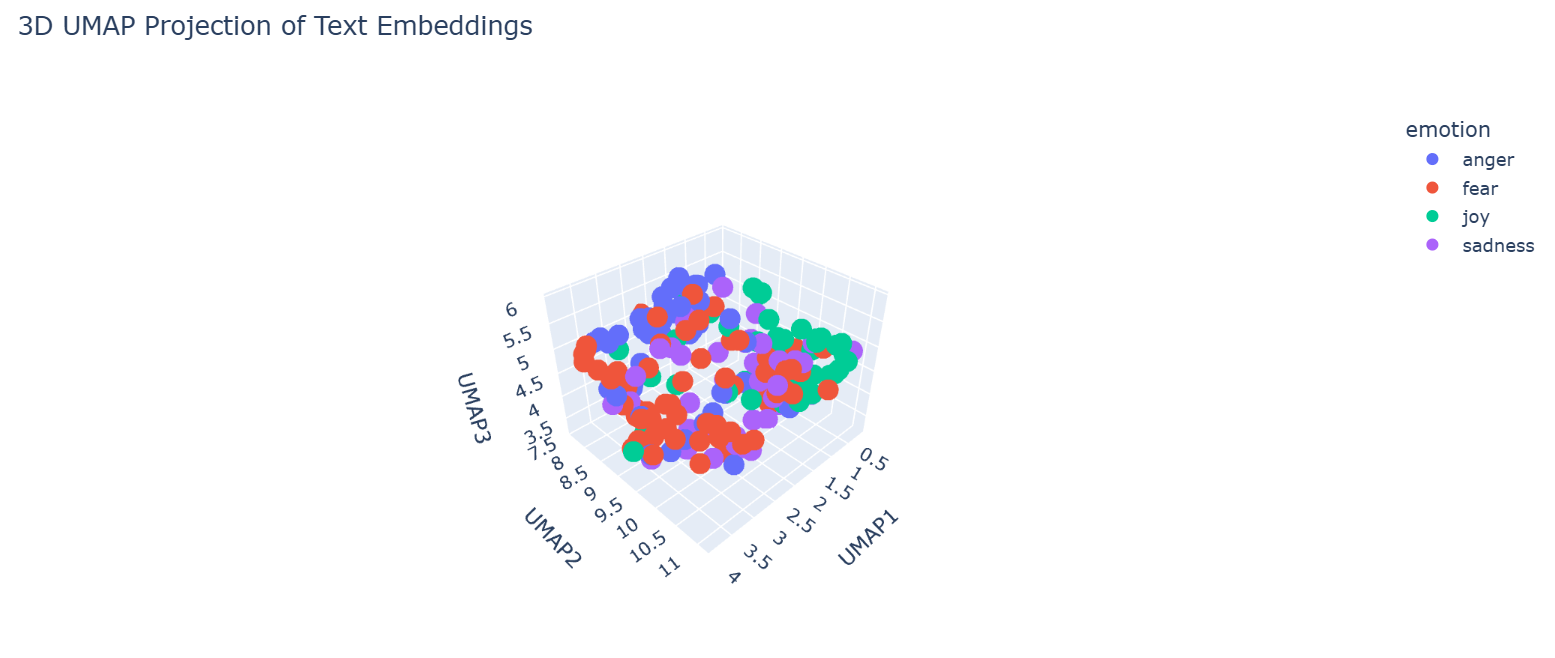

### Exercise 4 – Discussion

Comparing the 2D and 3D UMAP projections, we can see that:

1. **Overall structure is similar**:  
   Points with the same emotion label (anger, fear, joy, sadness) are still highly mixed, and there is no perfectly separated cluster.  
   This is consistent with the 2D plot and reflects the fact that emotion in text is often not strictly discrete.

2. **3D space provides slightly better separation in some regions**:  
   When rotating the 3D plot, some local areas show more compact groups for a given emotion (e.g., some joy or sadness points form tighter sub-clusters).  
   This suggests that reducing from 3072 → 3 dimensions keeps a bit more structure than 3072 → 2.

3. **But there is still heavy overlap**:  
   Because different emotions can share similar vocabulary or mixed feelings (e.g., “bittersweet”), their embeddings are naturally close in the semantic space.  
   Also, any dimensionality reduction will lose information, so even 3D cannot fully separate all classes.

In summary, the 3D UMAP visualization slightly improves the separability in some local regions and is helpful to explore the structure interactively, but it still shows that emotion classes are highly entangled in the embedding space.


---
### **2.5 Retrieval-Augmented Generation (RAG)**

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [43]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


In [44]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 726, 'output_tokens': 190}


The key challenges in realizing AGI's full potential stem from its fundamental requirements and the ethical considerations surrounding its development. These include:

*   **Learning from Diverse Data:** Unlike narrow AI, which is trained on structured data, AGI needs to learn from a wide variety of unstructured data sources.
*   **Computational Power:** The sheer amount of computational resources needed to process and learn from these vast and diverse datasets presents a significant hurdle.
*   **Ethical Concerns:** Developing AGI responsibly requires addressing critical ethical issues such as:
    *   **Bias and Fairness:** Ensuring algorithms are unbiased and treat everyone equally by training on diverse datasets and continuously monitoring performance.
    *   **Privacy:** Prioritizing user data protection through robust privacy measures and transparent data usage policies.
    *   **Accountability:** Establishing clear guidelines and legal frameworks to determine responsibility for decisions made by AGI systems and address any harm caused.


##### **Actual answer in the URL:**

![pic11.png](https://drive.google.com/uc?export=view&id=1M1b6pA2zqbmZ7R9IihPLoIb-0zHX8O3v)

##### **Content in the URL that might get into the generated answer because of similar semantic meaning:**

![pic12.png](https://drive.google.com/uc?export=view&id=17MO1suYVBAhCBCGEolzgkz7kWwn0bUEx)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### **>>> Bonus Exercise 5 (Take home):**

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [45]:
# Answer here
url = "https://www.ibm.com/think/topics/retrieval-augmented-generation"

#Create the retriever from that URL
retriever = load_and_retrieve_docs(url)

#Ask a question about the content of that page
question = (
    "According to this page, what are the RAG use cases."
)

#Run the RAG chain and show the answer
result = rag_chain(question=question, retriever=retriever)

from IPython.display import Markdown, display
display(Markdown("### RAG Answer\n" + result))
print("URL used:", url)
print("Question:", question)


logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 560, 'output_tokens': 261}


### RAG Answer
According to the provided text, the RAG use cases are:

*   **Content generation:** RAG models can cite authoritative sources, leading to more reliable content generation and making it easier for users to verify outputs for accuracy.
*   **Market analysis and product development:** Business leaders can use RAG to analyze social media trends, competitor activity, and news to inform business decisions. Product managers can reference customer feedback and user behaviors for future development choices.
*   **Knowledge engines:** RAG systems can empower employees with internal company information for streamlined onboarding, faster HR support, and on-demand guidance.
*   **Recommendation services:** RAG systems analyze user behavior and current offerings to power more accurate recommendations, keeping customers engaged on e-commerce platforms and content delivery services.
*   **Specialized chatbots and virtual assistants:** RAG equips customer support chatbots with specialized knowledge about a company's products, services, and policies by plugging models into internal data. It also enables more customized user experiences for AI avatars and personal assistants by connecting models with user data and past interactions.
*   **Research:** RAG models can read internal documents and interface with search engines to assist with research. Examples include financial analysts generating client-specific reports and medical professionals engaging with patient and institutional records.

URL used: https://www.ibm.com/think/topics/retrieval-augmented-generation
Question: According to this page, what are the RAG use cases.


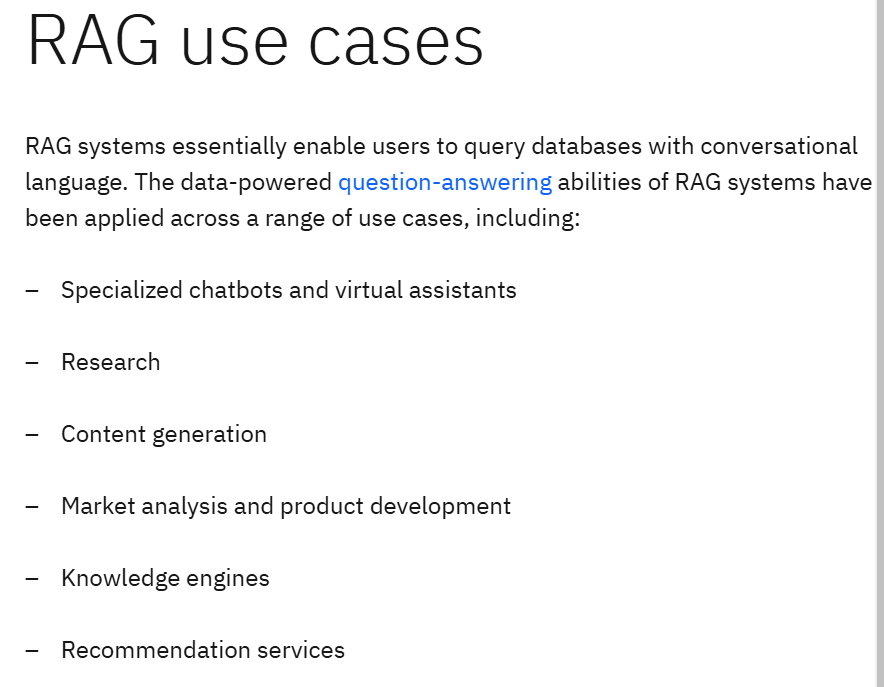

### Bonus Exercise 5 – Discussion

- **Quality of the RAG answer**

   - It responded really well, not only does it capture the used cases, it also capture
   the explaination of these used cases


---
### **2.6 Few-Shot Prompting Classification:**

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [46]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()

    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories:
"anger" | "fear" | "joy" | "sadness"
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text
                response = result.replace('"', '')
                response = response.replace("'", "")


        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)

    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./DM2025-Lab2-Exercise/results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"

    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories:
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:10<00:04,  1.16it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.74 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:08<00:07,  1.35it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.81 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:08,  1.68it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.28 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.31 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:59<00:04,  1.15it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.76 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:51<00:00,  5.59s/it]


Results saved to ./DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 52.50%
              precision    recall  f1-score   support

       anger       0.43      0.65      0.52        20
        fear       0.75      0.15      0.25        20
         joy       0.52      0.85      0.64        20
     sadness       0.69      0.45      0.55        20

    accuracy                           0.53        80
   macro avg       0.60      0.53      0.49        80
weighted avg       0.60      0.53      0.49        80



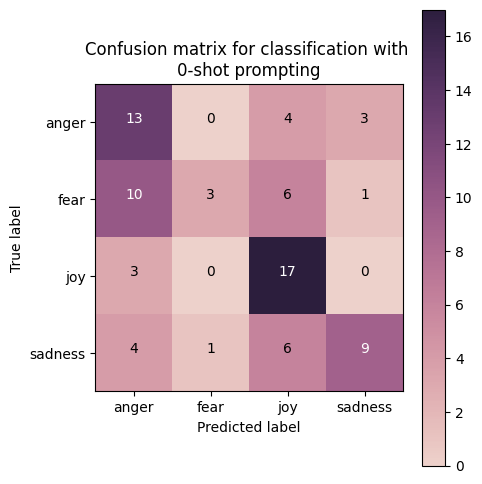

In [48]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories:
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: @oscar_perria a multimillionaire spoiled brat who gets In a self righteous huff bc his friend is Muslim is a non starter bye!
Class: anger

Text: If the future doesn't fill you with existential dread are you even a real person
Class: fear

Text: With a jovial Trump on his ass, Don King just publicly told a crowd that 'We need [him] because you will always be a nigger.'  #FuckTrump
Class: joy

Text: First weekend of fall; let's see if I can stay disciplined to this seasons goals. #fitness #running #sober #Mindset #firstfriday #family
Class: sadness




Processing samples for emotion: anger...:  55%|█████▌    | 11/20 [00:08<00:06,  1.37it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 50.90519885s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: fear...:  35%|███▌      | 7/20 [00:07<00:12,  1.02it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 36.228071296s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:54<01:16,  7.65s/it]

Rate limit of 15 requests per minute reached. Waiting for 1.39 seconds.


Processing samples for emotion: joy...:  15%|█▌        | 3/20 [00:01<00:08,  1.91it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 38.71228872s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:48<03:01, 12.10s/it]

Rate limit of 15 requests per minute reached. Waiting for 4.24 seconds.


Processing samples for emotion: joy...:  95%|█████████▌| 19/20 [01:04<00:00,  1.19it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 36.167655856s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 2.35 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:12<00:03,  1.48it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.69 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:05<00:00,  3.29s/it]


Results saved to ./DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 56.25%
              precision    recall  f1-score   support

       anger       0.43      0.60      0.50        20
        fear       0.80      0.20      0.32        20
         joy       0.59      0.80      0.68        20
     sadness       0.65      0.65      0.65        20

    accuracy                           0.56        80
   macro avg       0.62      0.56      0.54        80
weighted avg       0.62      0.56      0.54        80



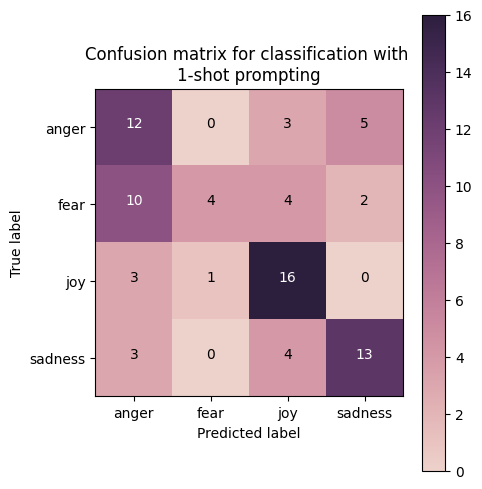

In [49]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories:
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: @oscar_perria a multimillionaire spoiled brat who gets In a self righteous huff bc his friend is Muslim is a non starter bye!
Class: anger

Text: @FitnessFirstAU something needs to be done about people hogging machines - nobody can use 3 machines at one time! #angry #notfair #whypay
Class: anger

Text: the 1975 are playing antichrist why won't @sundarakarma play hustle it's an outrage
Class: anger

Text: I don't mean to offend anyone, but 93.7 literally blames everything on white people. In some cases it's true, but a lot of times, it's not
Class: anger

Text: I guess #bradangelina &gt; #anger &gt; #blacklivesmatter
Class: anger

Text: If the future doesn't fill you with existential dread are you even a real person
Class: fear

Text: The kid at the pool yelling is about to get a foot up his 

Processing samples for emotion: anger...:  55%|█████▌    | 11/20 [00:08<00:07,  1.23it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 35.46840427s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:57<00:27,  5.51s/it]

Rate limit of 15 requests per minute reached. Waiting for 2.98 seconds.


Processing samples for emotion: fear...:  35%|███▌      | 7/20 [00:04<00:08,  1.52it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 35.502372229s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:52<01:16,  7.63s/it]

Rate limit of 15 requests per minute reached. Waiting for 3.80 seconds.


Processing samples for emotion: joy...:  15%|█▌        | 3/20 [00:02<00:13,  1.23it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 33.795028882s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:49<03:01, 12.12s/it]

Rate limit of 15 requests per minute reached. Waiting for 3.39 seconds.


Processing samples for emotion: joy...:  95%|█████████▌| 19/20 [01:03<00:00,  1.23it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 32.587824404s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 17.48 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:27<00:03,  1.47it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.73 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:21<00:00,  4.05s/it]


Results saved to ./DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 56.25%
              precision    recall  f1-score   support

       anger       0.46      0.55      0.50        20
        fear       0.80      0.20      0.32        20
         joy       0.59      0.80      0.68        20
     sadness       0.58      0.70      0.64        20

    accuracy                           0.56        80
   macro avg       0.61      0.56      0.53        80
weighted avg       0.61      0.56      0.53        80



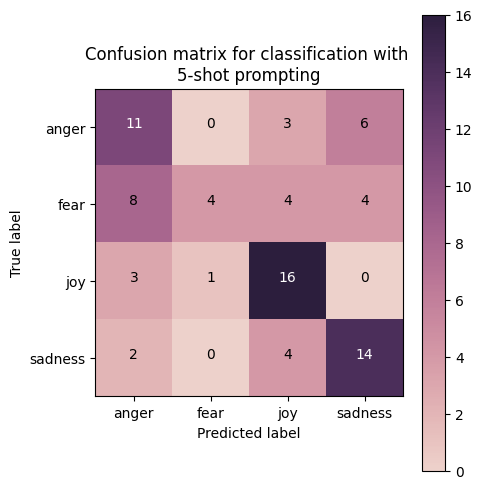

In [50]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### **>>> Exercise 6 (Take home):**

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here
# Zero-shot achieved around 50% accuracy, showing strong confusion between emotions, especially fear. With 1-shot,
# accuracy improved to about 55%, providing more balanced predictions. Using 5-shot slightly raised accuracy to 56.25%, mainly
# improving anger, joy, and sadness, while fear remained difficult with very low recall. Overall, more shots led to small but
# consistent gains, showing that few-shot prompting helps but cannot fully resolve overlapping emotion expressions in text.


---
##### **>>> Exercise 7 (Take home):**

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [51]:
# Answer here
import pandas as pd

# Directory where the CSV result files are stored
base_dir = "/content/DM2025-Lab2-Exercise/results/llm_classification_results"

# Load result files for 0-shot, 1-shot, and 5-shot
df_0 = pd.read_csv(f"{base_dir}/results_samples_20_shots_0.csv")
df_1 = pd.read_csv(f"{base_dir}/results_samples_20_shots_1.csv")
df_5 = pd.read_csv(f"{base_dir}/results_samples_20_shots_5.csv")

# Rename predicted label columns to distinguish them
df_0 = df_0.rename(columns={"predicted_emotion": "pred_0"})
df_1 = df_1.rename(columns={"predicted_emotion": "pred_1"})
df_5 = df_5.rename(columns={"predicted_emotion": "pred_5"})

# Merge on text + true label so we can compare predictions for the same example
merged = (
    df_0.merge(df_1, on=["text", "true_emotion"])
        .merge(df_5, on=["text", "true_emotion"])
)

print(f"Total aligned examples (appear in all 3 files): {len(merged)}")

# Booleans for correctness in each setting
correct_0 = merged["pred_0"] == merged["true_emotion"]
correct_1 = merged["pred_1"] == merged["true_emotion"]
correct_5 = merged["pred_5"] == merged["true_emotion"]

# 1) Cases where classification improves with more examples:
#    wrong in 0-shot, but correct in 1-shot or 5-shot
mask_improved = (~correct_0) & (correct_1 | correct_5)
df_improved = merged[mask_improved].copy()

# 2) Cases where it does not improve at all:
#    wrong in all three settings
mask_no_improve = (~correct_0) & (~correct_1) & (~correct_5)
df_no_improve = merged[mask_no_improve].copy()

# 3) Cases where classification gets worse with more examples:
#    correct in 0-shot, but wrong in both 1-shot and 5-shot
mask_worse = correct_0 & (~correct_1) & (~correct_5)
df_worse = merged[mask_worse].copy()

print("\n=== Summary of counts ===")
print(f"Improved with examples: {len(df_improved)}")
print(f"No improvement (always wrong): {len(df_no_improve)}")
print(f"Got worse with examples: {len(df_worse)}")

# Show a few examples from each category
print("\n=== Examples: Improved with more shots ===")
print(df_improved[["text", "true_emotion", "pred_0", "pred_1", "pred_5"]].head())

print("\n=== Examples: No improvement ===")
print(df_no_improve[["text", "true_emotion", "pred_0", "pred_1", "pred_5"]].head())

print("\n=== Examples: Got worse with more shots ===")
print(df_worse[["text", "true_emotion", "pred_0", "pred_1", "pred_5"]].head())



Total aligned examples (appear in all 3 files): 80

=== Summary of counts ===
Improved with examples: 7
No improvement (always wrong): 31
Got worse with examples: 2

=== Examples: Improved with more shots ===
                                                 text true_emotion pred_0  \
32  They'll be yo friend, shake your hand, then ki...         fear  anger   
60  On bedrest since I got out of the hospital. U ...      sadness  anger   
61  Buddha doesn't possess enough power to deliver...      sadness  anger   
64  Don't be disheartened if you didn't get the ca...      sadness   fear   
66  you are on an endless journey of figuring your...      sadness    joy   

     pred_1   pred_5  
32     fear     fear  
60    anger  sadness  
61    anger  sadness  
64  sadness  sadness  
66  sadness  sadness  

=== Examples: No improvement ===
                                                 text true_emotion   pred_0  \
3   Having a baby born too soon is #lifechanging 6...        anger      joy  

From the 80 aligned test examples, only 7 improved with more shots, while 31 remained incorrect in all settings and 2 became worse. This indicates that few-shot prompting provides limited benefit for this task, and many mistakes are systematic rather than due to missing examples.

Most improvements occurred in sadness and fear, suggesting these emotions benefit more from additional contextual cues. However, many anger examples were consistently misclassified as joy or sadness, showing strong class overlap and ambiguity in the dataset. The few cases that degraded reveal that added examples can sometimes bias the model toward certain labels.

Overall, the results show that few-shot prompting helps in some cases but cannot fully resolve inherent ambiguity in short social-media text.

---
### **2.7 Extra LLM Related Materials:**
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---